# L5 Data Engineer
## Module 6 Topic 1 - Webinar
## Introduction to Data Collection and Ingestion

In this workshop we are going to learn how to perform data collection in Python


## Loading the libraries

In this case we are going to use the library pandas. You can find the documentation of the library [here](https://pandas.pydata.org/). This library is one of the most important libraries to analyse data in Python (It is connected with [Numpy](http://www.numpy.org/))

In [82]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from io import BytesIO

In [83]:
# Reading the data from a website!
url = 'https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index-v2.xls'
## there is an normally easier way but sometimes website permission stop that!
# houses = pd.read_excel(url, sheet_name='Average price', index_col=0)

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'
}

response = requests.get(url, headers=headers)
if response.status_code == 200:
    houses = pd.read_excel(BytesIO(response.content),
                           sheet_name='Average price',
                           index_col=0,
                           engine='openpyxl')
else:
    print(f"Failed to download: {response.status_code}")

In [84]:
houses.head()

,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,E09000010,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1995-01-01,90347,51870,98948,64956,76880,83082,119775,70118,85469,77018,...,40907,42171,43856,46470,56098,79687,64502,52799,NaN,50231
1995-02-01,81213,52513,98848,64786,77651,83068,118365,69908,86551,77698,...,40877,41912,44344,47249,55991,77913,64196,52462,NaN,50130
1995-03-01,78168,52701,97848,64366,77644,82856,119131,69666,87067,76674,...,41351,42544,43701,47345,55574,79110,64597,51716,NaN,50229
1995-04-01,76172,54618,96273,64276,78668,82525,118948,69562,87933,75880,...,41195,42934,44414,47359,55966,79708,65111,52877,NaN,50597


In [85]:
# Let's have a look to the dimensions of the table
houses.shape

(362, 48)

In [86]:
# transpose the table
df = houses.T

In [87]:
df.head()

,NaT,1995-01-01,1995-02-01,1995-03-01,1995-04-01,1995-05-01,1995-06-01,1995-07-01,1995-08-01,1995-09-01,...,2024-04-01,2024-05-01,2024-06-01,2024-07-01,2024-08-01,2024-09-01,2024-10-01,2024-11-01,2024-12-01,2025-01-01
City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,103215,...,906682,890881,821191,749029,727214,715165,698786,698826,811537,832241
Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,52909,...,344029,342471,337468,332788,325557,330914,344488,356482,355385,353442
Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,98936,...,610143,617515,619324,623551,628124,625854,626818,628529,623055,613205
Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,64508,...,396790,395029,399510,398542,404304,406573,409095,406993,404921,406363
Brent,E09000005,76880,77651,77644,78668,79464,80118,79920,79295,79557,...,541329,539206,566566,569031,581099,585990,595453,594264,573146,576271


In [88]:
#What does the following function do?
df=df.reset_index()

In [89]:
df.head()

,index,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2024-04-01 00:00:00,2024-05-01 00:00:00,2024-06-01 00:00:00,2024-07-01 00:00:00,2024-08-01 00:00:00,2024-09-01 00:00:00,2024-10-01 00:00:00,2024-11-01 00:00:00,2024-12-01 00:00:00,2025-01-01 00:00:00
0,City of London,E09000001,90347,81213,78168,76172,83392,93757,108801,110976,...,906682,890881,821191,749029,727214,715165,698786,698826,811537,832241
1,Barking & Dagenham,E09000002,51870,52513,52701,54618,54524,55200,53569,53691,...,344029,342471,337468,332788,325557,330914,344488,356482,355385,353442
2,Barnet,E09000003,98948,98848,97848,96273,95737,95577,96992,97968,...,610143,617515,619324,623551,628124,625854,626818,628529,623055,613205
3,Bexley,E09000004,64956,64786,64366,64276,63995,64251,63721,64431,...,396790,395029,399510,398542,404304,406573,409095,406993,404921,406363
4,Brent,E09000005,76880,77651,77644,78668,79464,80118,79920,79295,...,541329,539206,566566,569031,581099,585990,595453,594264,573146,576271


In [90]:
# Let's check the column names
df.columns

Index([            'index',                 NaT, 1995-01-01 00:00:00,
       1995-02-01 00:00:00, 1995-03-01 00:00:00, 1995-04-01 00:00:00,
       1995-05-01 00:00:00, 1995-06-01 00:00:00, 1995-07-01 00:00:00,
       1995-08-01 00:00:00,
       ...
       2024-04-01 00:00:00, 2024-05-01 00:00:00, 2024-06-01 00:00:00,
       2024-07-01 00:00:00, 2024-08-01 00:00:00, 2024-09-01 00:00:00,
       2024-10-01 00:00:00, 2024-11-01 00:00:00, 2024-12-01 00:00:00,
       2025-01-01 00:00:00],
      dtype='object', length=363)

In [91]:
# Change the name of a column
df = df.rename(columns = {'index':'Borough', pd.NaT: 'ID'})

In [92]:
df.columns

Index([          'Borough',                'ID', 1995-01-01 00:00:00,
       1995-02-01 00:00:00, 1995-03-01 00:00:00, 1995-04-01 00:00:00,
       1995-05-01 00:00:00, 1995-06-01 00:00:00, 1995-07-01 00:00:00,
       1995-08-01 00:00:00,
       ...
       2024-04-01 00:00:00, 2024-05-01 00:00:00, 2024-06-01 00:00:00,
       2024-07-01 00:00:00, 2024-08-01 00:00:00, 2024-09-01 00:00:00,
       2024-10-01 00:00:00, 2024-11-01 00:00:00, 2024-12-01 00:00:00,
       2025-01-01 00:00:00],
      dtype='object', length=363)

In [93]:
data_frame = pd.melt(df, id_vars= ['Borough', 'ID'])

In [94]:
data_frame.head()

,Borough,ID,variable,value
0,City of London,E09000001,1995-01-01 00:00:00,90347
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,51870
2,Barnet,E09000003,1995-01-01 00:00:00,98948
3,Bexley,E09000004,1995-01-01 00:00:00,64956
4,Brent,E09000005,1995-01-01 00:00:00,76880


In [95]:
data_frame = data_frame.rename(columns = {'variable':'Time', 'value': 'Average_price'})

In [96]:
data_frame.head()

,Borough,ID,Time,Average_price
0,City of London,E09000001,1995-01-01 00:00:00,90347
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,51870
2,Barnet,E09000003,1995-01-01 00:00:00,98948
3,Bexley,E09000004,1995-01-01 00:00:00,64956
4,Brent,E09000005,1995-01-01 00:00:00,76880


In [97]:
data_frame.dtypes

,0
Borough,object
ID,object
Time,object
Average_price,object


How to select particular column in a dataframe :D

In [98]:
data_frame['Average_price'] = pd.to_numeric(data_frame['Average_price'])

In [99]:
data_frame.dtypes

,0
Borough,object
ID,object
Time,object
Average_price,float64


In [100]:
data_frame.count()

,0
Borough,17328
ID,16245
Time,17328
Average_price,16245


In [101]:
data_frame.Borough.unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [102]:
data_frame[data_frame.Borough == 'Unnamed: 33'].head()

,Borough,ID,Time,Average_price


In [103]:
data_frame[data_frame.Borough == 'Unnamed: 36'].head()

,Borough,ID,Time,Average_price


In [104]:
# Lets check a dataframe only with NaN values in the ID
data_frame[data_frame.ID.isna()]

,Borough,ID,Time,Average_price
33,Unnamed: 34,NaN,1995-01-01 00:00:00,NaN
36,Unnamed: 37,NaN,1995-01-01 00:00:00,NaN
46,Unnamed: 47,NaN,1995-01-01 00:00:00,NaN
81,Unnamed: 34,NaN,1995-02-01 00:00:00,NaN
84,Unnamed: 37,NaN,1995-02-01 00:00:00,NaN
...,...,...,...,...
17268,Unnamed: 37,NaN,2024-12-01 00:00:00,NaN
17278,Unnamed: 47,NaN,2024-12-01 00:00:00,NaN
17313,Unnamed: 34,NaN,2025-01-01 00:00:00,NaN
17316,Unnamed: 37,NaN,2025-01-01 00:00:00,NaN


In [105]:
# How are we going to deal with NaN values?
# in this case it seems that there were original empty entries
# Challenge 1 find two different ways to drop NaN values

## First method
# filtering

df_clean1 = data_frame[data_frame.Average_price.notna()]
df_clean1.head(48)

,Borough,ID,Time,Average_price
0,City of London,E09000001,1995-01-01 00:00:00,90347.00
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,51870.00
2,Barnet,E09000003,1995-01-01 00:00:00,98948.00
3,Bexley,E09000004,1995-01-01 00:00:00,64956.00
4,Brent,E09000005,1995-01-01 00:00:00,76880.00
5,Bromley,E09000006,1995-01-01 00:00:00,83082.00
6,Camden,E09000007,1995-01-01 00:00:00,119775.00
7,Croydon,E09000008,1995-01-01 00:00:00,70118.00
8,Ealing,E09000009,1995-01-01 00:00:00,85469.00
9,Enfield,E09000010,1995-01-01 00:00:00,77018.00


In [106]:
df_clean1.count()

,0
Borough,16245
ID,16245
Time,16245
Average_price,16245


In [107]:
# filtering the data with NaN values
df_clean2 = data_frame.dropna()
df_clean2.head(48)

,Borough,ID,Time,Average_price
0,City of London,E09000001,1995-01-01 00:00:00,90347.00
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,51870.00
2,Barnet,E09000003,1995-01-01 00:00:00,98948.00
3,Bexley,E09000004,1995-01-01 00:00:00,64956.00
4,Brent,E09000005,1995-01-01 00:00:00,76880.00
5,Bromley,E09000006,1995-01-01 00:00:00,83082.00
6,Camden,E09000007,1995-01-01 00:00:00,119775.00
7,Croydon,E09000008,1995-01-01 00:00:00,70118.00
8,Ealing,E09000009,1995-01-01 00:00:00,85469.00
9,Enfield,E09000010,1995-01-01 00:00:00,77018.00


In [108]:
df_clean2.count()

,0
Borough,16245
ID,16245
Time,16245
Average_price,16245


Let's use the df_clean2 dataset for the next analysis because it contains all the boroughs in London

In [109]:
#So far we have seen different data types such an objects, numerical values and dates.
# Now we are going to create new variables based on the date to have only year variable.
df_ready = df_clean2

In [110]:
df_ready.loc[:,'Year'] = df_ready.Time.apply(lambda x: x.year)

<ipython-input-110-9f600d545688>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ready.loc[:,'Year'] = df_ready.Time.apply(lambda x: x.year)


In [111]:
df_ready.head()

,Borough,ID,Time,Average_price,Year
0,City of London,E09000001,1995-01-01 00:00:00,90347.00,1995
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,51870.00,1995
2,Barnet,E09000003,1995-01-01 00:00:00,98948.00,1995
3,Bexley,E09000004,1995-01-01 00:00:00,64956.00,1995
4,Brent,E09000005,1995-01-01 00:00:00,76880.00,1995


In [112]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ready.Average_price.describe()

,Average_price
count,16245.00
mean,315964.12
std,226364.36
min,38528.00
25%,148653.00
50%,258948.00
75%,433153.00
max,1656986.00


In [113]:
df_ready = df_ready.drop(columns=['ID', 'Time'])
df_ready.head()


,Borough,Average_price,Year
0,City of London,90347.00,1995
1,Barking & Dagenham,51870.00,1995
2,Barnet,98948.00,1995
3,Bexley,64956.00,1995
4,Brent,76880.00,1995


In [114]:

df_year = df_ready.groupby(by=['Borough','Year']).mean()
df_year.sample(15)

,,Average_price
Borough,Year,
Hammersmith & Fulham,2006,411784.75
Hillingdon,1999,111852.25
EAST MIDLANDS,2000,59930.00
England,2009,157253.75
Westminster,2017,1131942.75
Hillingdon,1998,100300.58
Brent,2009,285066.50
Barnet,1996,99707.00
YORKS & THE HUMBER,2004,104472.17


In [115]:
df_final = df_year.reset_index()
df_final.head(3)

,Borough,Year,Average_price
0,Barking & Dagenham,1995,53265.42
1,Barking & Dagenham,1996,53162.67
2,Barking & Dagenham,1997,57537.58


In [116]:
#function takes d (which is a dictionary of prices for grouped/sorted boroughs)
#and creates a dictionary of the price ratio from today to 20/15/10/5 years ago
def createPriceRatio(d):
     return [float(d.Average_price[d.Year == 2018].iloc[0])/float(d.Average_price[d.Year == 1998].iloc[0]),
                                           float(d.Average_price[d.Year == 2018].iloc[0])/float(d.Average_price[d.Year == 2003].iloc[0]),
                                           float(d.Average_price[d.Year == 2018].iloc[0])/float(d.Average_price[d.Year == 2008].iloc[0]),
                                           float(d.Average_price[d.Year == 2018].iloc[0])/float(d.Average_price[d.Year == 2013].iloc[0])]

In [117]:
print("first unique borough", df_final.Borough.unique()[0])
createPriceRatio(df_final[df_final.Borough == df_final.Borough.unique()[0]])

first unique borough Barking & Dagenham


[4.896419753750491, 2.07149159861072, 1.5755232627572613, 1.6990665561690166]

In [118]:
final = {}
for i in range(len(df_final.Borough.unique())):
    d = df_final[df_final.Borough == df_final.Borough.unique()[i]]
    final[df_final.Borough.unique()[i]] = createPriceRatio(d)
print(final['Barking & Dagenham'])

[4.896419753750491, 2.07149159861072, 1.5755232627572613, 1.6990665561690166]


In [119]:
final= pd.DataFrame(final)
final=final.T
final = final.reset_index()
final.head()

,index,0,1,2,3
0,Barking & Dagenham,4.90,2.07,1.58,1.70
1,Barnet,4.36,2.12,1.62,1.42
2,Bexley,4.25,2.08,1.63,1.61
3,Brent,4.90,2.28,1.68,1.45
4,Bromley,4.09,2.05,1.60,1.49


In [120]:
final = final.rename(columns = {'index':'Borough',0:'20y', 1:'15y', 2:'10y', 3:'5y'})

final.head()

,Borough,20y,15y,10y,5y
0,Barking & Dagenham,4.90,2.07,1.58,1.70
1,Barnet,4.36,2.12,1.62,1.42
2,Bexley,4.25,2.08,1.63,1.61
3,Brent,4.90,2.28,1.68,1.45
4,Bromley,4.09,2.05,1.60,1.49


<Axes: xlabel='Borough', ylabel='20y'>

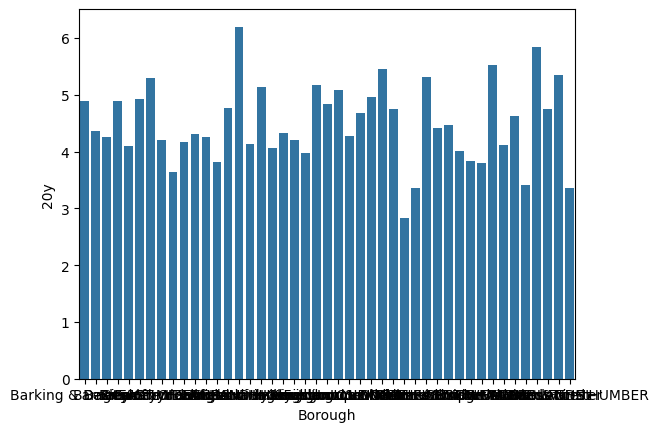

In [121]:
sns.barplot(y='20y', x='Borough', data=final)

In [122]:
Top10_20y = final.sort_values(by='20y', ascending= False).head(10)
Top10_20y

,Borough,20y,15y,10y,5y
14,Hackney,6.20,2.71,1.75,1.46
41,Waltham Forest,5.84,2.52,1.89,1.73
37,Southwark,5.52,2.53,1.73,1.40
27,Lewisham,5.45,2.41,1.78,1.58
43,Westminster,5.35,2.81,1.89,1.29
31,Newham,5.31,2.13,1.62,1.61
6,City of London,5.30,2.90,1.84,1.38
21,Inner London,5.17,2.50,1.72,1.39
16,Haringey,5.13,2.50,1.82,1.48
23,Kensington & Chelsea,5.08,2.96,1.74,1.21


In [123]:
Top10_15y = final.sort_values(by='15y', ascending= False).head(10)
Top10_15y

,Borough,20y,15y,10y,5y
23,Kensington & Chelsea,5.08,2.96,1.74,1.21
6,City of London,5.30,2.90,1.84,1.38
43,Westminster,5.35,2.81,1.89,1.29
14,Hackney,6.20,2.71,1.75,1.46
5,Camden,4.93,2.61,1.68,1.26
37,Southwark,5.52,2.53,1.73,1.40
41,Waltham Forest,5.84,2.52,1.89,1.73
26,Lambeth,4.96,2.52,1.73,1.41
16,Haringey,5.13,2.50,1.82,1.48
21,Inner London,5.17,2.50,1.72,1.39


In [124]:
Top10_5y = final.sort_values(by='5y', ascending= False).head(10)
Top10_5y

,Borough,20y,15y,10y,5y
41,Waltham Forest,5.84,2.52,1.89,1.73
0,Barking & Dagenham,4.90,2.07,1.58,1.70
18,Havering,4.33,2.07,1.60,1.64
31,Newham,5.31,2.13,1.62,1.61
2,Bexley,4.25,2.08,1.63,1.61
7,Croydon,4.20,1.99,1.57,1.58
27,Lewisham,5.45,2.41,1.78,1.58
33,Redbridge,4.47,2.08,1.60,1.54
13,Greenwich,4.76,2.27,1.68,1.53
19,Hillingdon,4.20,2.02,1.61,1.52


In [125]:
df_ready.Average_price.max()

1656986.0